In [83]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [84]:
!ls "/content/gdrive/My Drive/Credit Risk Analysis"

bankloans.csv  creditanalysis.ipynb


In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [86]:
#load dataset
data = pd.read_csv("/content/gdrive/My Drive/Credit Risk Analysis/bankloans.csv")

In [87]:
data.head()
#1= defaulted, 0=Never defaulted

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [88]:
data.shape

(850, 9)

In [89]:
data.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

In [90]:
df = data[data['default'].notnull()]

In [91]:
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [92]:
df.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

In [93]:
df.shape

(700, 9)

In [94]:
df.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,34.860000,1.722857,8.388571,8.278571,45.601429,10.260571,1.553553,3.058209,0.261429
std,7.997342,0.928206,6.658039,6.824877,36.814226,6.827234,2.117197,3.287555,0.439727
min,20.000000,1.000000,0.000000,0.000000,14.000000,0.400000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.000000,0.369059,1.044178,0.000000
50%,34.000000,1.000000,7.000000,7.000000,34.000000,8.600000,0.854869,1.987567,0.000000
75%,40.000000,2.000000,12.000000,12.000000,55.000000,14.125000,1.901955,3.923065,1.000000
max,56.000000,5.000000,31.000000,34.000000,446.000000,41.300000,20.561310,27.033600,1.000000


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       700 non-null    int64  
 1   ed        700 non-null    int64  
 2   employ    700 non-null    int64  
 3   address   700 non-null    int64  
 4   income    700 non-null    int64  
 5   debtinc   700 non-null    float64
 6   creddebt  700 non-null    float64
 7   othdebt   700 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 54.7 KB


In [96]:
df.groupby('ed')["default"].count()

ed
1    372
2    198
3     87
4     38
5      5
Name: default, dtype: int64

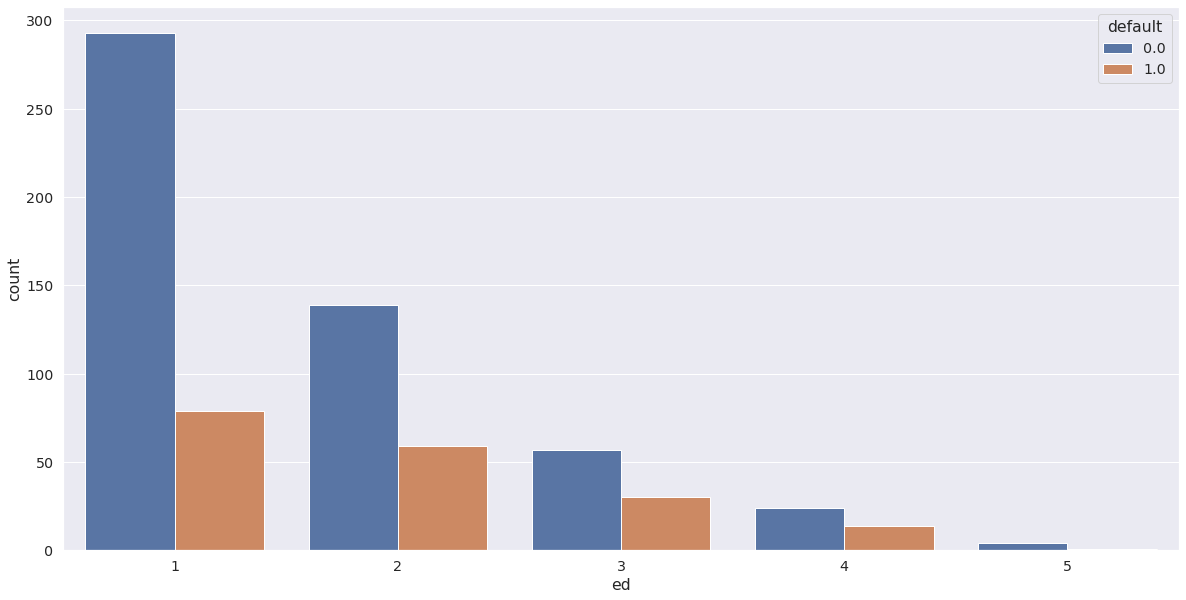

In [97]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x="ed", hue='default',data=df)

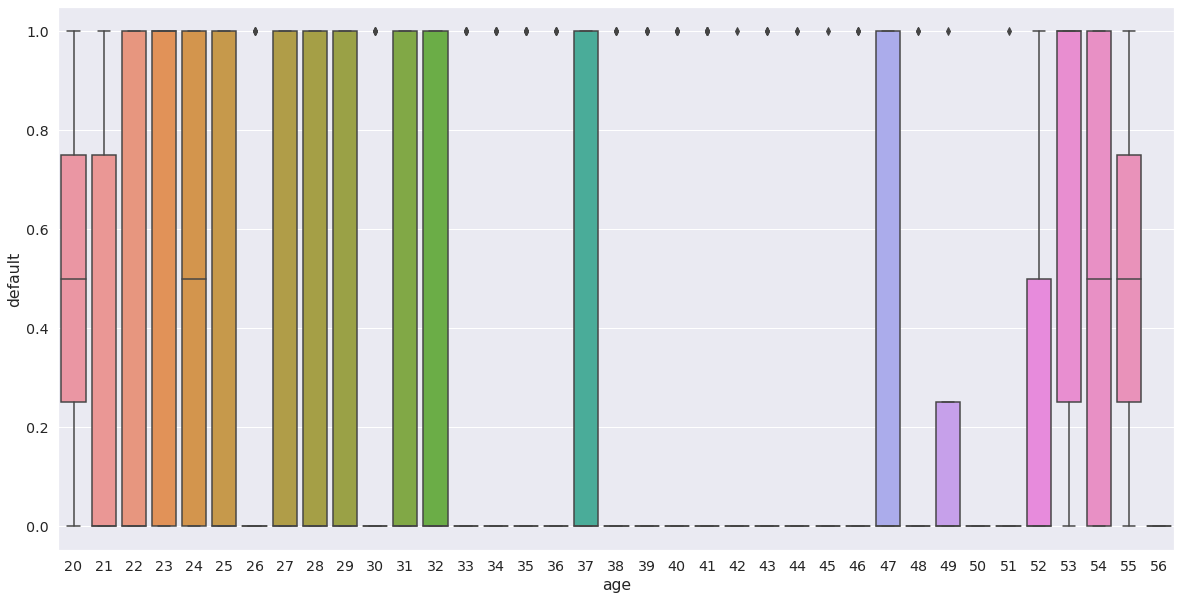

In [98]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='age',y='default' ,data = df)

In [99]:
df.groupby(['default'])['age'].count()

default
0.0    517
1.0    183
Name: age, dtype: int64

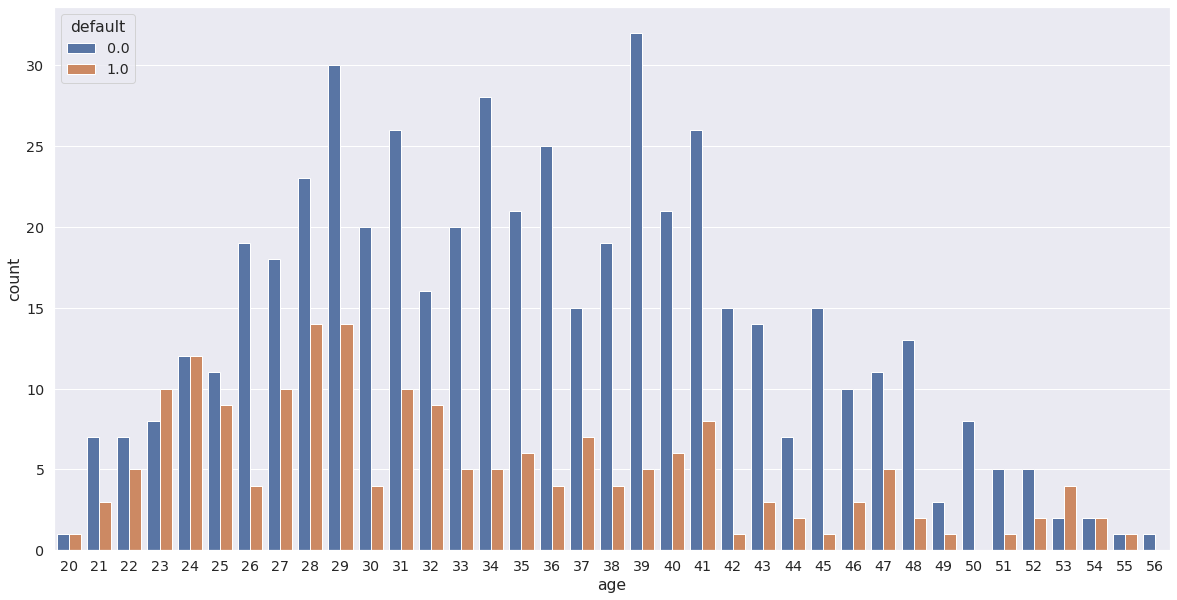

In [100]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x="age", hue='default',data=df)

In [101]:
df.corr()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
age,1.000000,0.022325,0.536497,0.597591,0.478710,0.016398,0.295207,0.340217,-0.137657
ed,0.022325,1.000000,-0.153621,0.056919,0.235190,0.008838,0.088274,0.165459,0.114676
employ,0.536497,-0.153621,1.000000,0.322334,0.619681,-0.031182,0.403694,0.406091,-0.282978
address,0.597591,0.056919,0.322334,1.000000,0.316245,0.011323,0.208435,0.226514,-0.164451
income,0.478710,0.235190,0.619681,0.316245,1.000000,-0.026777,0.570199,0.610659,-0.070970
debtinc,0.016398,0.008838,-0.031182,0.011323,-0.026777,1.000000,0.501767,0.584870,0.389575
creddebt,0.295207,0.088274,0.403694,0.208435,0.570199,0.501767,1.000000,0.633104,0.244740
othdebt,0.340217,0.165459,0.406091,0.226514,0.610659,0.584870,0.633104,1.000000,0.145713
default,-0.137657,0.114676,-0.282978,-0.164451,-0.070970,0.389575,0.244740,0.145713,1.000000


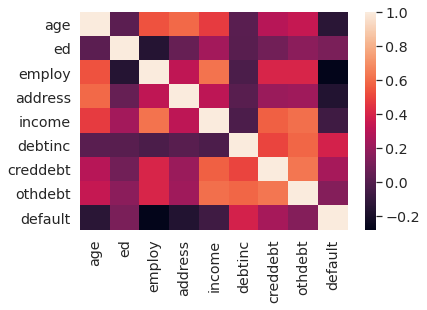

In [102]:
sns.heatmap(df.corr())

In [103]:
df.corr()["default"]

age        -0.137657
ed          0.114676
employ     -0.282978
address    -0.164451
income     -0.070970
debtinc     0.389575
creddebt    0.244740
othdebt     0.145713
default     1.000000
Name: default, dtype: float64

In [104]:
from sklearn.linear_model import LogisticRegression

In [105]:
x_train = df[['age','ed','employ','address','income','debtinc','creddebt','othdebt']]

In [106]:
y_train = df['default']

In [107]:
df_test= data[data.default.isnull()]

In [108]:
df_test.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
700,36,1,16,13,32,10.9,0.544128,2.943872,NaN
701,50,1,6,27,21,12.9,1.316574,1.392426,NaN
702,40,1,9,9,33,17.0,4.880700,0.729300,NaN
703,31,1,5,7,23,2.0,0.046000,0.414000,NaN
704,29,1,4,0,24,7.8,0.866736,1.005264,NaN


In [109]:
x_test = df_test.drop(columns='default')
y_test = df_test['default']

In [110]:
logisticRegr = LogisticRegression()

In [111]:
logisticRegr.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [112]:
x_train_1 = df[['ed','debtinc','creddebt','othdebt']]
y_train = df['default']

In [113]:
logisticRegr_1 = LogisticRegression()

In [114]:
logisticRegr_1.fit(x_train_1, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [115]:
from sklearn.tree import DecisionTreeRegressor

In [116]:
model = DecisionTreeRegressor()

In [117]:
X = df[['age','ed','employ','address','income','debtinc','creddebt','othdebt']]
y=df['default']

In [118]:
model.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [119]:
importance = model.feature_importances_
importance

array([0.09488658, 0.02349093, 0.12994149, 0.09502079, 0.07821324,
       0.23580509, 0.18792137, 0.1547205 ])

Feature: 0, Score: 0.09489
Feature: 1, Score: 0.02349
Feature: 2, Score: 0.12994
Feature: 3, Score: 0.09502
Feature: 4, Score: 0.07821
Feature: 5, Score: 0.23581
Feature: 6, Score: 0.18792
Feature: 7, Score: 0.15472


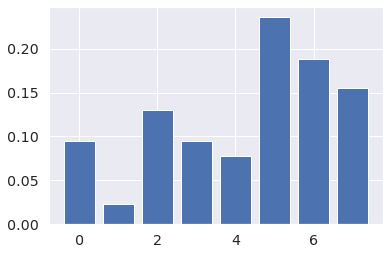

In [120]:
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [121]:
from sklearn.ensemble import RandomForestRegressor

In [122]:
model = RandomForestRegressor()


In [123]:
# fit the model
model.fit(X, y)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Feature: 0, Score: 0.09821
Feature: 1, Score: 0.02879
Feature: 2, Score: 0.17263
Feature: 3, Score: 0.10224
Feature: 4, Score: 0.08527
Feature: 5, Score: 0.23304
Feature: 6, Score: 0.16341
Feature: 7, Score: 0.11640


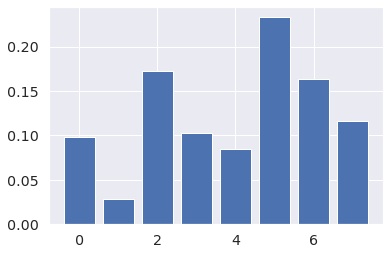

In [124]:
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [125]:
print(f'Model Accuracy: {model.score(X, y)}')

Model Accuracy: 0.8906188498166175


In [126]:
from sklearn.ensemble import RandomForestClassifier

In [127]:
model = RandomForestClassifier()

Feature: 0, Score: 0.10688
Feature: 1, Score: 0.04012
Feature: 2, Score: 0.15781
Feature: 3, Score: 0.09511
Feature: 4, Score: 0.10746
Feature: 5, Score: 0.19198
Feature: 6, Score: 0.16435
Feature: 7, Score: 0.13629


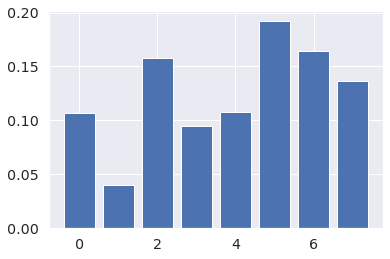

In [128]:
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [129]:
from sklearn.tree import DecisionTreeClassifier

In [130]:
#save the feature name and target variables
feature_names = X.columns
labels = y.unique()

In [131]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,
                                                 test_size = 0.2,
                                                 random_state = 42)

In [132]:
labels

array([1., 0.])

In [133]:
clf = DecisionTreeClassifier(max_depth =3, random_state = 42)
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [134]:
#import relevant packages
#from sklearn import tree

#plt the figure, setting a black background
#plt.figure(figsize=(30,10), facecolor ='k')
#create the tree plot
#a = tree.plot_tree(clf,
                   #use the feature names stored
                   #feature_names = feature_names,
                   #use the class names stored
                   #class_names = labels,
                   #rounded = True,
                   #filled = True)

#show the plot
#plt.show()

In [135]:
#import relevant functions
from sklearn.tree import export_text
#export the decision rules
tree_rules = export_text(clf,
                        feature_names = list(feature_names))
#print the result
print(tree_rules)

|--- debtinc <= 12.45
|   |--- employ <= 4.50
|   |   |--- age <= 32.50
|   |   |   |--- class: 0.0
|   |   |--- age >  32.50
|   |   |   |--- class: 0.0
|   |--- employ >  4.50
|   |   |--- creddebt <= 8.43
|   |   |   |--- class: 0.0
|   |   |--- creddebt >  8.43
|   |   |   |--- class: 1.0
|--- debtinc >  12.45
|   |--- employ <= 3.50
|   |   |--- debtinc <= 24.30
|   |   |   |--- class: 1.0
|   |   |--- debtinc >  24.30
|   |   |   |--- class: 1.0
|   |--- employ >  3.50
|   |   |--- creddebt <= 4.85
|   |   |   |--- class: 0.0
|   |   |--- creddebt >  4.85
|   |   |   |--- class: 1.0



In [136]:
test_pred_decision_tree = clf.predict(x_test)

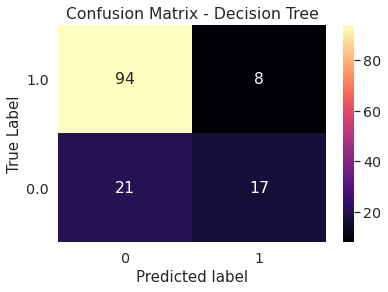

<Figure size 720x504 with 0 Axes>

In [137]:
#import the relevant packages
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
#get the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test,  
                                            test_pred_decision_tree)
#turn this into a dataframe
matrix_df = pd.DataFrame(confusion_matrix)
#plot the result
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
#set axis titles
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
#ax.set_xticklabels(['']+labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()

In [138]:
metrics.accuracy_score(y_test, test_pred_decision_tree)


0.7928571428571428

In [139]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [140]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [141]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [142]:
xg_reg = xgb.XGBRegressor(objective ='reg:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [143]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [144]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.425300


In [145]:
params = {"objective":"reg:logistic",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [146]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,0.489567,0.000906,0.489788,0.000667
1,0.479402,0.000735,0.480193,0.001344
2,0.469963,0.000875,0.471482,0.001428
3,0.461201,0.001018,0.463357,0.002984
4,0.454614,0.000853,0.457505,0.003158


In [147]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.397762
Name: test-rmse-mean, dtype: float64


In [148]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

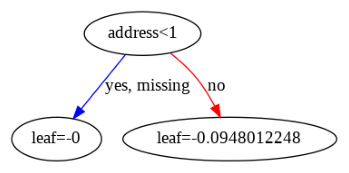

In [149]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

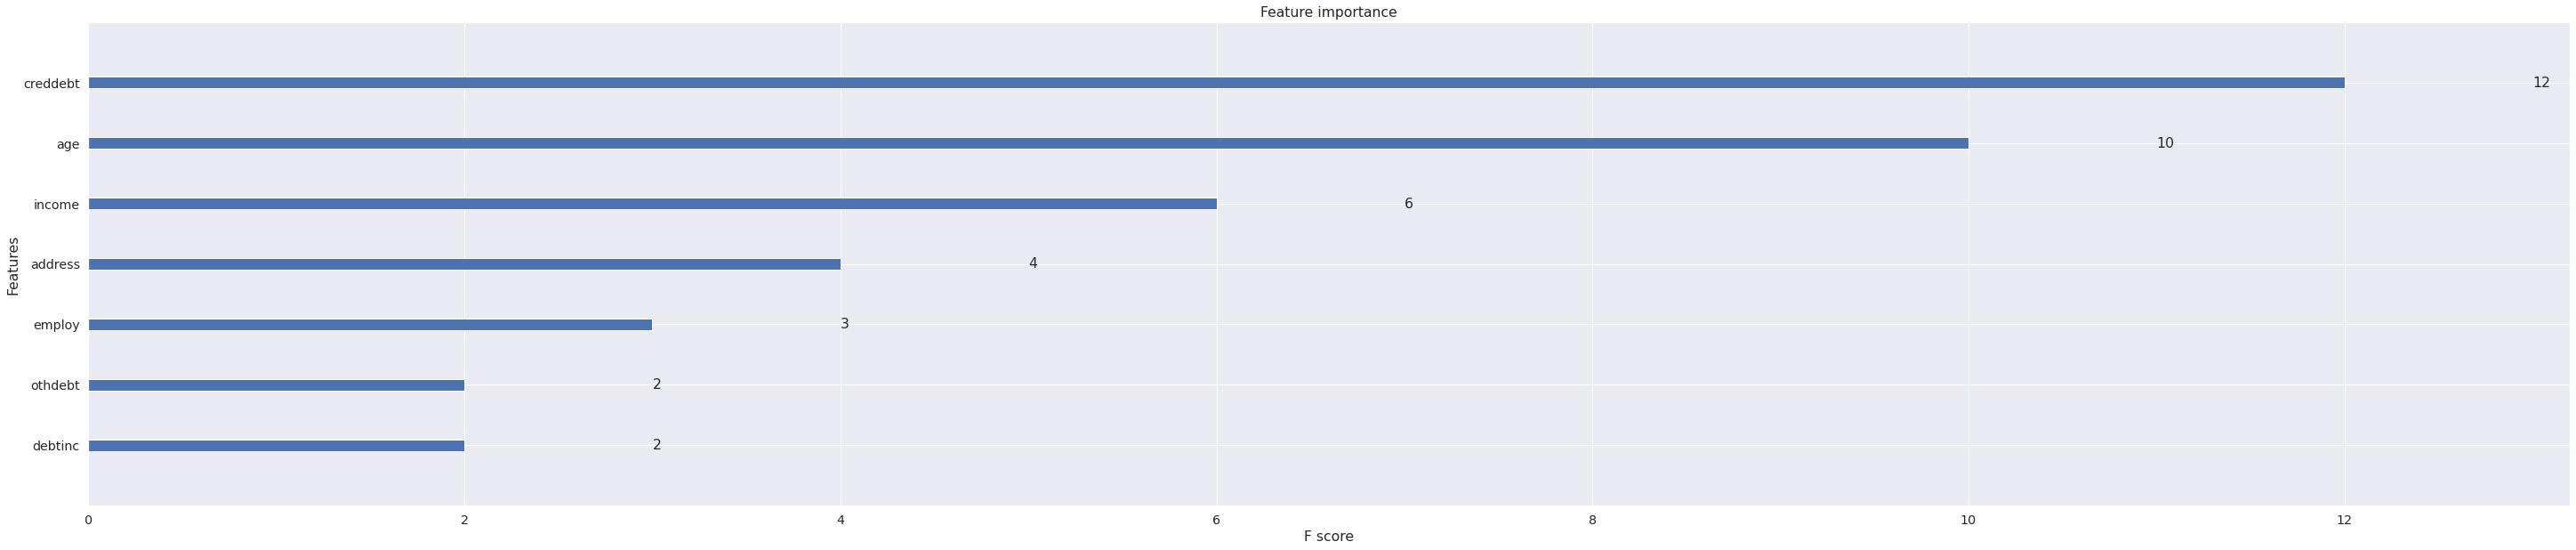

In [150]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()